In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
acc_main = np.array([11.012,14.879,14.751999999999999,18.821,19.817,28.652000000000005,32.944,43.323,40.419000000000004,44.345000000000006,54.274,60.410000000000004,57.033,63.967000000000006,65.067,70.081,72.76400000000001,79.627,76.781,78.362,77.437,82.54700000000001,82.97199999999998,83.892,81.957,83.85099999999998,84.417,84.84799999999998,87.706,85.788,87.27899999999998,86.809,88.251,87.945,89.97900000000001,90.061,89.434,89.88,89.64099999999999,90.19999999999999,89.897,90.03100000000002,89.65,90.59100000000002,90.801,90.93,91.053,91.16400000000002,90.905,90.78099999999999,90.937,91.773,91.67,91.76199999999999,91.614,91.917,91.455,92.36199999999998,91.26000000000002,92.56500000000001,92.108])

In [3]:
acc_random = np.array([13.636,13.565000000000001,18.436999999999998,14.99,20.809999999999995,22.016,33.513,31.744999999999997,44.146,44.247,54.147000000000006,53.818000000000005,55.236000000000004,59.952999999999996,58.068000000000005,65.037,73.45,75.62100000000001,77.098,78.563,81.31299999999999,79.80199999999999,84.16099999999999,80.78299999999999,84.39099999999999,84.46,86.442,86.128,86.23899999999999,88.106,86.389,90.439,90.053,87.4,89.55499999999999,90.483,90.54200000000002,91.535,91.489,91.451,91.427,92.08900000000001,92.192,92.485,92.605,93.22200000000001,92.18799999999999,92.905,92.55800000000002,93.21199999999999,92.917,93.434,93.261,93.63300000000001,93.43299999999999,93.707,93.661,93.86800000000002,93.69800000000002,93.527,93.821])

In [4]:
cotaf_pd = pd.read_csv('02/cotaf_results02/accuracy_results.csv')
acc_cotaf = np.array(cotaf_pd['accuracy'])

In [5]:
sync_data = pd.read_csv('02/results_sync02/accuracy_results.csv')
sync_acc = np.array(sync_data['accuracy'])

In [6]:
safa_data = pd.read_csv('02/safa_results02/accuracy_results.csv')
safa_acc = np.array(safa_data['accuracy'])

In [7]:
window_size = 8
poly_order = 1

semiasync = savgol_filter(acc_main, window_size, poly_order)
random = savgol_filter(acc_random, window_size, poly_order)
sync = savgol_filter(sync_acc, window_size, poly_order)
safa = savgol_filter(safa_acc[:-1], 15, poly_order)
cotaf = savgol_filter(acc_cotaf, window_size, poly_order)

In [8]:
print(len(semiasync), len(random), len(sync), len(safa), len(cotaf))

61 61 61 61 61


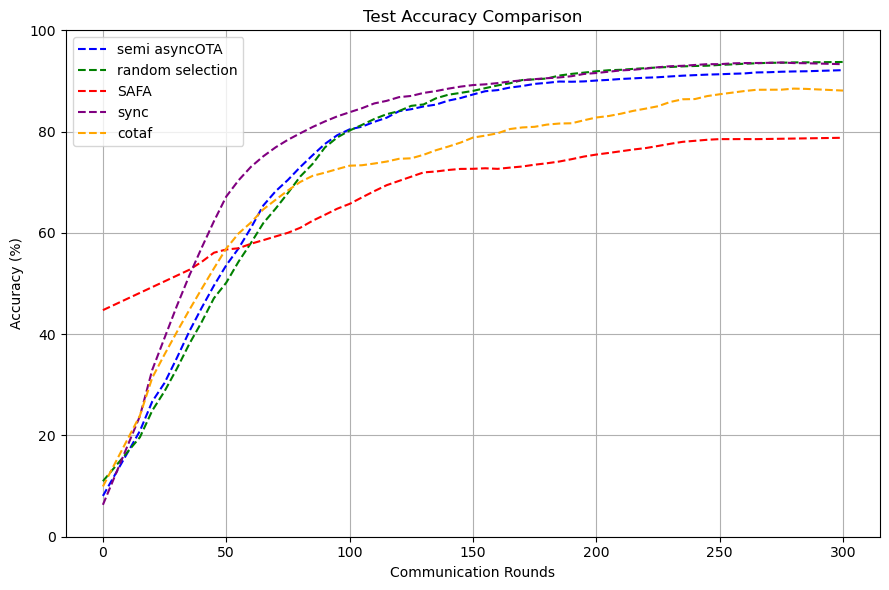

In [9]:
eval_rounds = [5 * i for i in range(len(semiasync))]
methods = [
    ('semi asyncOTA', semiasync),
    ('random selection', random),
    ('SAFA', safa),
    ('sync', sync),
    ('cotaf', cotaf),
]

colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(9, 6))

for (label, data), color in zip(methods, colors):
    plt.plot(eval_rounds, data, linestyle='--', color=color, label=label)

plt.title("Test Accuracy Comparison")
plt.xlabel("Communication Rounds")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
acc_main = np.array([12.287,23.426,30.201000000000004,32.13000000000001,43.327999999999996,49.814,53.462,57.233000000000004,61.970000000000006,68.122,72.56199999999998,70.523,77.501,80.432,80.828,83.70200000000001,83.173,87.499,86.16999999999999,85.763,88.85499999999999,89.52599999999998,87.991,89.239,90.81800000000001,89.52199999999999,89.348,90.511,91.55199999999999,91.375,92.06199999999998,92.376,92.768,92.36200000000001,92.57199999999999,92.738,93.304,93.39900000000002,93.489,93.33099999999999,93.28600000000002,93.53399999999999,93.54700000000001,93.905,93.658,93.86800000000001,93.941,93.873,93.99800000000002,94.28399999999999,94.19500000000002,94.43500000000002,94.232,94.38900000000001,94.41800000000002,94.34900000000002,94.577,94.53399999999999,94.508,94.778,94.62100000000001])

In [11]:
acc_random = np.array([11.989,16.653,23.041,30.823,34.93599999999999,40.894,54.788,48.086,58.739,64.50899999999999,66.02900000000001,70.994,77.41499999999999,77.342,80.99100000000001,82.07700000000001,84.281,82.337,85.275,84.76400000000001,87.196,88.97299999999998,89.82799999999999,90.554,89.98400000000001,90.734,91.458,90.79199999999999,91.973,92.399,92.00099999999999,92.31,92.698,93.02399999999999,93.161,92.627,93.23400000000001,93.13000000000001,93.459,93.54100000000001,93.845,93.503,93.447,93.929,94.08899999999998,94.144,94.28,94.00400000000002,94.07,94.23600000000002,94.282,94.333,94.59100000000001,94.42399999999999,94.32399999999998,94.56300000000002,94.84599999999998,94.626,94.657,94.642,94.72400000000002])

In [12]:
cotaf_pd = pd.read_csv('alpha10/cotaf_results2/accuracy_results.csv')
acc_cotaf = np.array(cotaf_pd['accuracy'])

In [13]:
sync_data = pd.read_csv('alpha10/results_sync02/accuracy_results.csv')
sync_acc = np.array(sync_data['accuracy'])

In [14]:
safa_data = pd.read_csv('alpha10/safa_results02/accuracy_results.csv')
safa_acc = np.array(safa_data['accuracy'])

In [15]:
window_size = 8
poly_order = 1

semiasync = savgol_filter(acc_main, window_size, poly_order)
random = savgol_filter(acc_random, window_size, poly_order)
sync = savgol_filter(sync_acc, window_size, poly_order)
safa = savgol_filter(safa_acc[:-1], window_size, poly_order)
cotaf = savgol_filter(acc_cotaf, window_size, poly_order)

In [16]:
print(len(semiasync), len(random), len(sync), len(safa), len(cotaf))

61 61 61 61 61


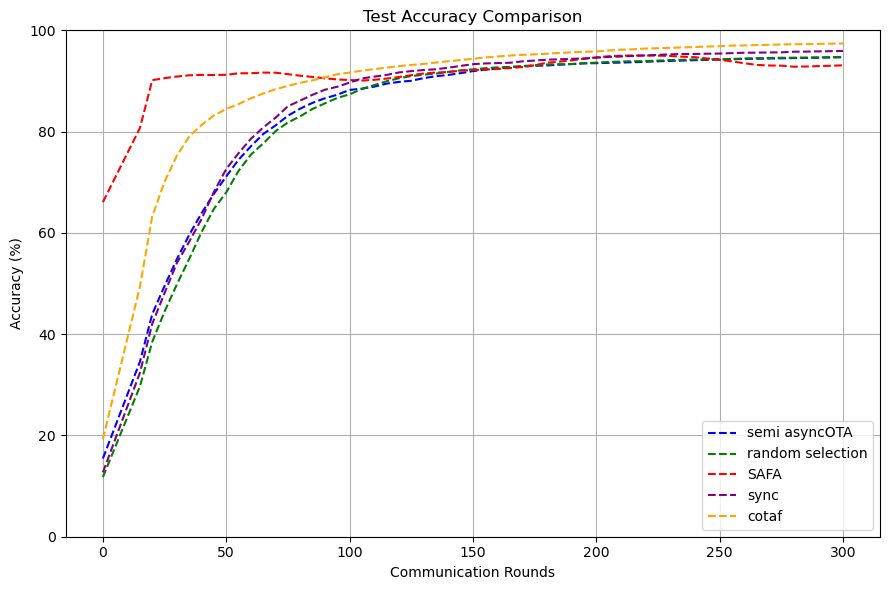

In [17]:
eval_rounds = [5 * i for i in range(len(semiasync))]
methods = [
    ('semi asyncOTA', semiasync),
    ('random selection', random),
    ('SAFA', safa),
    ('sync', sync),
    ('cotaf', cotaf),
]

colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(9, 6))

for (label, data), color in zip(methods, colors):
    plt.plot(eval_rounds, data, linestyle='--', color=color, label=label)

plt.title("Test Accuracy Comparison")
plt.xlabel("Communication Rounds")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
acc_main = np.array([12.615,20.223000000000003,32.037,42.105000000000004,47.746,53.03399999999999,49.056,53.36099999999999,58.76099999999999,70.309,71.92699999999999,75.54399999999998,76.174,82.071,81.181,85.963,85.968,84.56299999999999,87.064,87.963,87.57000000000001,89.20000000000002,89.384,91.439,90.26100000000001,91.571,91.64699999999999,92.03900000000002,91.775,91.99100000000001,92.116,92.14000000000001,92.63499999999999,92.804,93.23499999999999,92.821,93.22900000000001,92.924,93.406,93.60300000000001,93.63399999999999,93.59200000000001,93.797,93.99,94.11500000000001,93.854,94.253,94.053,94.229,94.23800000000001,94.33500000000001,94.43800000000002,94.46700000000001,94.537,94.362,94.56199999999998,94.698,94.678,94.601,94.71700000000001,94.871])

In [19]:
acc_random = np.array([10.922999999999998,17.919999999999998,29.310000000000002,37.19499999999999,49.43599999999999,47.537,52.10600000000001,54.407000000000004,57.303,66.035,72.61299999999999,70.444,80.102,81.171,77.117,85.48499999999999,85.399,85.682,87.13799999999999,89.121,88.00699999999999,88.674,89.99600000000001,90.784,89.36099999999999,91.629,90.009,92.31200000000001,91.586,92.06400000000001,92.379,92.561,92.801,92.92500000000001,93.24600000000001,93.364,93.24199999999999,93.17999999999998,93.40799999999999,93.746,93.649,93.86800000000002,93.98400000000001,94.14800000000001,93.93,93.798,93.987,94.25399999999999,94.31300000000002,94.525,94.324,94.403,94.31,94.57700000000001,94.534,94.73500000000001,94.708,94.738,94.76599999999999,94.951,94.88199999999999])

In [20]:
cotaf_pd = pd.read_csv('alpha100/cotaf_results100/accuracy_results.csv')
acc_cotaf = np.array(cotaf_pd['accuracy'])

In [21]:
sync_data = pd.read_csv('alpha100/results_sync02/accuracy_results.csv')
sync_acc = np.array(sync_data['accuracy'])

In [22]:
safa_data = pd.read_csv('alpha100/safa_results100/accuracy_results.csv')
safa_acc = np.array(safa_data['accuracy'])

In [23]:
window_size = 8
poly_order = 1

semiasync = savgol_filter(acc_main, window_size, poly_order)
random = savgol_filter(acc_random, window_size, poly_order)
sync = savgol_filter(sync_acc, window_size, poly_order)
safa = savgol_filter(safa_acc[:-1], window_size, poly_order)
cotaf = savgol_filter(acc_cotaf, window_size, poly_order)

In [24]:
print(len(semiasync), len(random), len(sync), len(safa), len(cotaf))

61 61 61 61 61


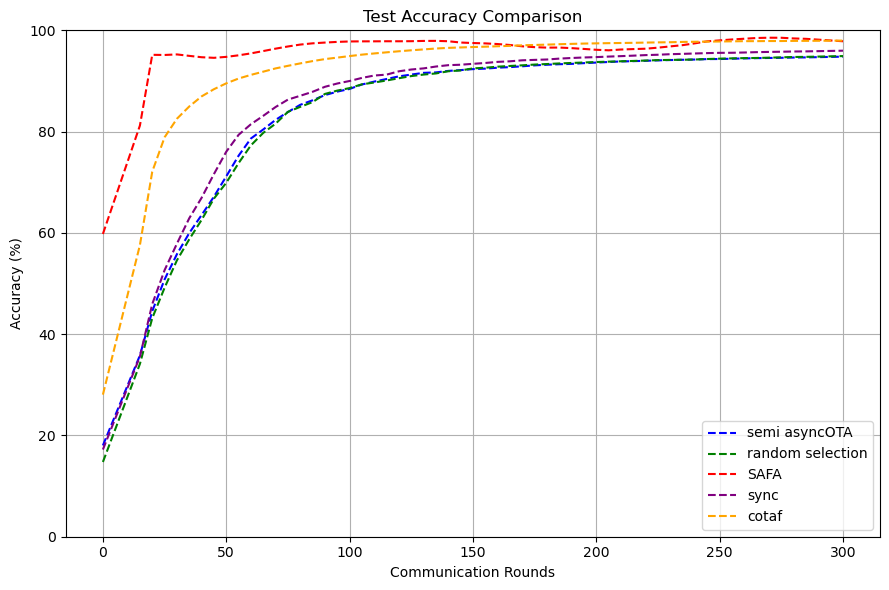

In [26]:
eval_rounds = [5 * i for i in range(len(semiasync))]
methods = [
    ('semi asyncOTA', semiasync),
    ('random selection', random),
    ('SAFA', safa),
    ('sync', sync),
    ('cotaf', cotaf),
]

colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(9, 6))

for (label, data), color in zip(methods, colors):
    plt.plot(eval_rounds, data, linestyle='--', color=color, label=label)

plt.title("Test Accuracy Comparison")
plt.xlabel("Communication Rounds")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()